# Iman Noor
---

# **Classification Algorithms using scikit-learn**

Classification algorithms in scikit-learn are used to categorize data into predefined classes. Some common ones include:

1. **Logistic Regression:** Models the probability of a binary outcome using the logistic function.
2. **k-Nearest Neighbors (k-NN):** Classifies data based on the majority class of its nearest neighbors.
3. **Support Vector Machines (SVM):** Finds the optimal hyperplane that separates classes with the maximum margin.
4. **Decision Trees:** Splits data into subsets based on feature values to make decisions.
5. **Random Forests:** An ensemble of decision trees that improves classification accuracy by averaging multiple trees.
6. **Gradient Boosting:** Builds models sequentially, each correcting errors of the previous one to improve performance.
7. **Naive Bayes:** Applies Bayes' theorem with an assumption of feature independence to classify data.
8. **AdaBoost:** It is an ensemble learning method that combines multiple weak classifiers to create a strong classifier.
9. **Linear Discriminant Analysis (LDA)** 

## Importing libraries

In [1]:
# Importing necessary tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Data Preparation**

We will use a synthetic dataset for predicting whether a customer will buy a product based on their browsing behavior on an e-commerce website. The features will include:

- `page_views`: Number of pages viewed by the customer.
- `time_on_site`: Time spent on the website (in minutes).
- `clicked_ads`: Number of ads clicked by the customer.
- `avg_session_time`: Average time spent per session (in minutes).
- `purchased`: Binary target variable (0: did not buy, 1: bought).


In [2]:
# Synthetic data
np.random.seed(42)
num_samples = 200
page_views = np.random.randint(1, 50, num_samples)
time_on_site = np.random.randint(1, 300, num_samples)
clicked_ads = np.random.randint(0, 10, num_samples)
avg_session_time = np.random.randint(1, 20, num_samples)
purchased = (page_views + time_on_site / 30 + clicked_ads + avg_session_time > 30).astype(int)

In [3]:
df = pd.DataFrame({
    'page_views': page_views,
    'time_on_site': time_on_site,
    'clicked_ads': clicked_ads,
    'avg_session_time': avg_session_time,
    'purchased': purchased
})
df.head()

,page_views,time_on_site,clicked_ads,avg_session_time,purchased
0,39,96,9,12,1
1,29,233,4,13,1
2,15,180,6,13,1
3,43,113,8,15,1
4,8,52,4,16,0


In [4]:
features = df.drop('purchased', axis=1)
target = df['purchased']

In [5]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

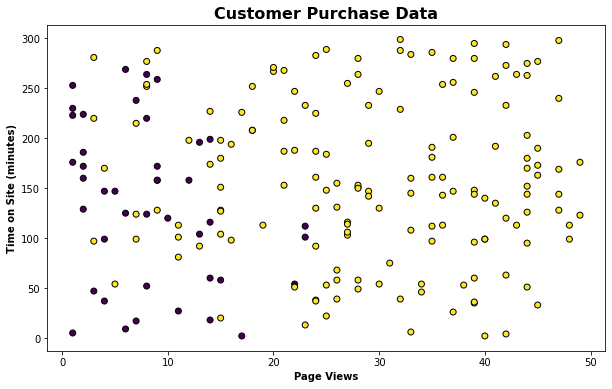

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['page_views'], df['time_on_site'], c=df['purchased'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Customer Purchase Data', weight='bold', fontsize=16)
plt.xlabel('Page Views', weight='bold')
plt.ylabel('Time on Site (minutes)', weight='bold')
plt.show()

## **IRIS DATASET**

In [7]:
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for easy visualization
y = iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing Classification Algorithms

## **1. Logistic Regression:**

Logistic Regression models the probability of a binary outcome using the logistic function.


In [11]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [12]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

In [13]:
y_pred_log = log_reg.predict(X_test)

Accuracy: 75.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.70      0.47      0.56        15
           2       0.63      0.80      0.71        15

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.74        45
weighted avg       0.76      0.76      0.74        45


Confusion Matrix:
 [[15  0  0]
 [ 1  7  7]
 [ 0  3 12]]


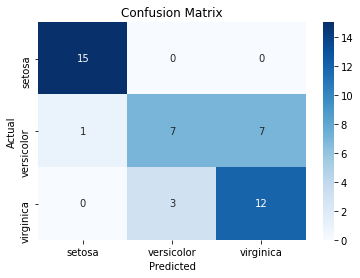

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
class_report = classification_report(y_test, y_pred_log)
print('\nClassification Report:\n', class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
print('\nConfusion Matrix:\n', conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('Decision Boundary')
    plt.show()

In [16]:
# Use only the first two features for visualization
X_vis = X_train[:, :2]
model_vis = LogisticRegression()
model_vis.fit(X_vis, y_train)

LogisticRegression()

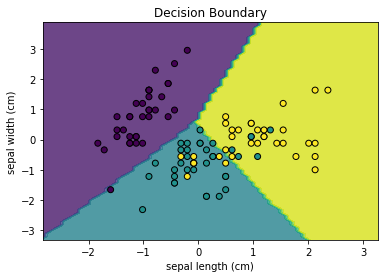

In [17]:
plot_decision_boundary(model_vis, X_vis, y_train)

In [18]:
# Print each test point with its predicted label
print("Test Points and Predictions:")
for i in range(len(X_test)):
    print(f"Point: {X_test[i]}, Predicted Label: {y_pred_log[i]}")

Test Points and Predictions:
Point: [ 1.66119088 -0.34116698], Predicted Label: 2
Point: [ 0.26392752 -0.34116698], Predicted Label: 1
Point: [ 0.49680475 -0.56093712], Predicted Label: 2
Point: [0.49680475 0.53791358], Predicted Label: 2
Point: [ 0.26392752 -0.12139684], Predicted Label: 2
Point: [0.9625592 0.0983733], Predicted Label: 2
Point: [-0.43470415 -1.65978782], Predicted Label: 1
Point: [-0.31826554 -1.22024754], Predicted Label: 1
Point: [-0.55114277  0.75768372], Predicted Label: 0
Point: [1.19543642 0.0983733 ], Predicted Label: 2
Point: [-0.08538832  2.07630456], Predicted Label: 0
Point: [-1.7155289  -0.12139684], Predicted Label: 0
Point: [ 0.9625592  -1.22024754], Predicted Label: 2
Point: [ 0.72968197 -0.12139684], Predicted Label: 2
Point: [-0.78401999  0.75768372], Predicted Label: 0
Point: [0.38036614 0.75768372], Predicted Label: 2
Point: [-1.13333583 -1.44001768], Predicted Label: 1
Point: [-0.55114277  1.41699414], Predicted Label: 0
Point: [-0.90045861  0.5379

## **2. k-Nearest Neighbors (k-NN):**

k-NN classifies data based on the majority class of its nearest neighbors.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
y_pred_knn = knn.predict(X_test)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 73.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.59      0.67      0.62        15
           2       0.62      0.53      0.57        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45


Confusion Matrix:
 [[15  0  0]
 [ 1  7  7]
 [ 0  3 12]]


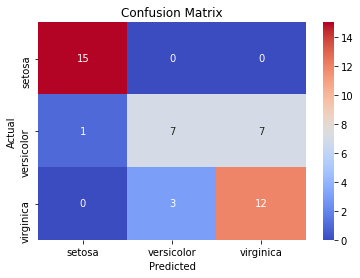

In [22]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy*100:.2f}%')

class_report = classification_report(y_test, y_pred_knn)
print('\nClassification Report:\n', class_report)

conf_matrix = confusion_matrix(y_test, y_pred_log)
print('\nConfusion Matrix:\n', conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Visualize the decision boundaries
def plot_decision_boundaries(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)
        
    # Highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='k', alpha=1.0, linewidths=1,
                    marker='o', s=100, label='test set')

In [24]:
# Calculate the indices of the test samples
test_idx = np.arange(len(y_train), len(y_train) + len(y_test))

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


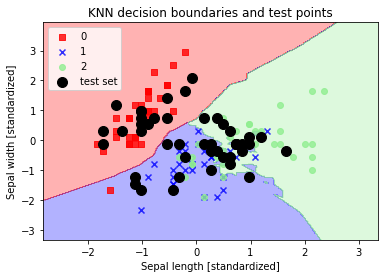

In [25]:
# Plotting decision boundaries and test points
plot_decision_boundaries(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), classifier=knn, test_idx=test_idx)
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('KNN decision boundaries and test points')
plt.show()

## **3. Support Vector Machines (SVM):**

SVM finds the optimal hyperplane that separates classes with the maximum margin.

In [26]:
from sklearn.svm import SVC

In [27]:
# Train the SVM model
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [28]:
y_pred_svm = model.predict(X_test)

Accuracy: 68.89%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.60      0.56        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45


Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]


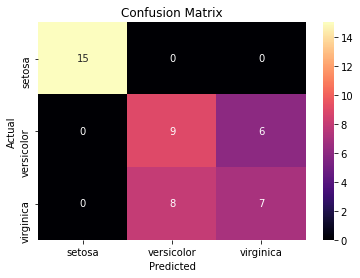

In [29]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy*100:.2f}%')

class_report = classification_report(y_test, y_pred_svm)
print('\nClassification Report:\n', class_report)

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('\nConfusion Matrix:\n', conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualize the Decision Boundaries

In [30]:
from sklearn.decomposition import PCA

In [31]:
colors = ['#FF9999', '#66B3FF', '#99FF99'] 

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
# Train the SVM model on the reduced data
model_pca = SVC(kernel='linear', C=1)
model_pca.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear')

In [33]:
# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

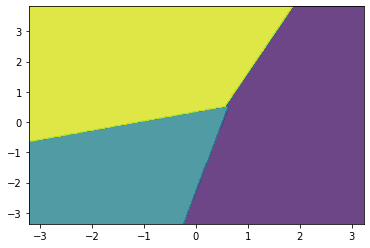

In [34]:
# Plot decision boundaries
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

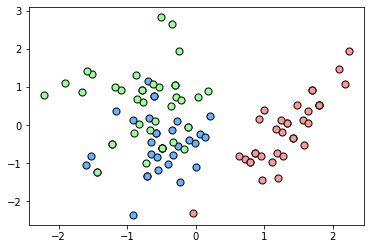

In [35]:
# Plot training points with custom colors
for idx, color in enumerate(colors):
    plt.scatter(X_train_pca[y_train == idx, 0], X_train_pca[y_train == idx, 1], c=color, edgecolors='k', marker='o', s=50, label=iris.target_names[idx])

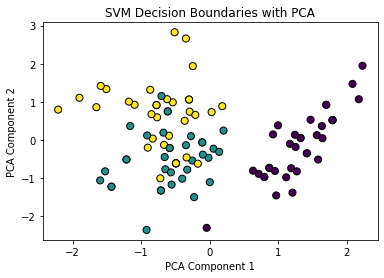

In [36]:
# Plot training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundaries with PCA')
plt.show()

In [37]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [38]:
X2, y2 = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=y2)

In [39]:
# Standardize the features
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [40]:
# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X2_train, y2_train)

SVC(kernel='linear', random_state=42)

In [41]:
def plot_decision_bound(X, y, classifier, title, test_idx=None, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=f'Class {cl}')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='k', alpha=1.0, linewidths=1,
                    marker='o', s=100, label='test set')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


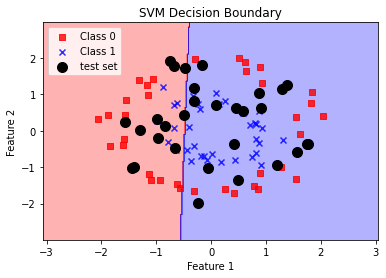

In [42]:
plot_decision_bound(np.vstack((X2_train, X2_test)), np.hstack((y2_train, y2_test)),
                         classifier=svm, title='SVM Decision Boundary', test_idx=range(len(y2_train), len(y2_train) + len(y2_test)))

## Visualize the Decision Boundary in 3D

In [43]:
# Extend the dataset to 3D by adding a new feature (for visualization purposes)
X2_train_3d = np.c_[X2_train, X2_train[:, 0] * X2_train[:, 1]]
X2_test_3d = np.c_[X2_test, X2_test[:, 0] * X2_test[:, 1]]

In [44]:
# Train the SVM model on the extended dataset
svm_3d = SVC(kernel='linear', C=1.0, random_state=42)
svm_3d.fit(X2_train_3d, y2_train)

SVC(kernel='linear', random_state=42)

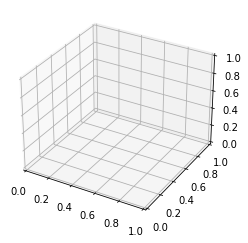

In [45]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

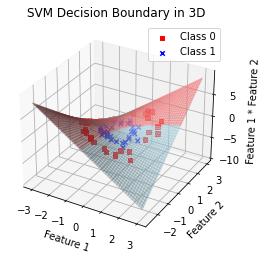

In [46]:
# Create a grid for plotting decision boundary
x1_min, x1_max = X2_train_3d[:, 0].min() - 1, X2_train_3d[:, 0].max() + 1
x2_min, x2_max = X2_train_3d[:, 1].min() - 1, X2_train_3d[:, 1].max() + 1
x3_min, x3_max = X2_train_3d[:, 2].min() - 1, X2_train_3d[:, 2].max() + 1

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
xx3 = xx1 * xx2

Z = svm_3d.predict(np.array([xx1.ravel(), xx2.ravel(), xx3.ravel()]).T)
Z = Z.reshape(xx1.shape)

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundary
ax.plot_surface(xx1, xx2, xx3, facecolors=ListedColormap(('lightcoral', 'lightblue'))(Z), alpha=0.3)

# Plot training points
markers = ('s', 'x')
colors = ('red', 'blue')  # Customize your colors here
for idx, cl in enumerate(np.unique(y2_train)):
    ax.scatter(X2_train_3d[y2_train == cl, 0], X2_train_3d[y2_train == cl, 1], X2_train_3d[y2_train == cl, 2],
               color=colors[idx], marker=markers[idx], label=f'Class {cl}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 1 * Feature 2')
ax.set_title('SVM Decision Boundary in 3D')
ax.legend()
plt.show()


## **4. Decision Trees:**

Decision Trees split data into subsets based on feature values to make decisions.


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y_pred_dt = clf.predict(X_test)

Accuracy: 66.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.53      0.53      0.53        15
           2       0.58      0.47      0.52        15

    accuracy                           0.67        45
   macro avg       0.65      0.67      0.65        45
weighted avg       0.65      0.67      0.65        45


Confusion Matrix:
 [[15  0  0]
 [ 2  8  5]
 [ 1  7  7]]


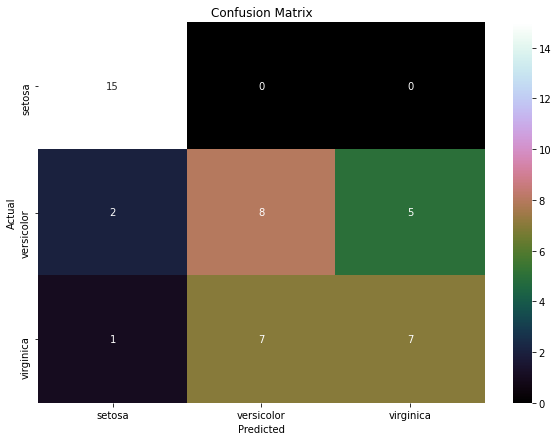

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
class_report = classification_report(y_test, y_pred_dt)
print('\nClassification Report:\n', class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cubehelix', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

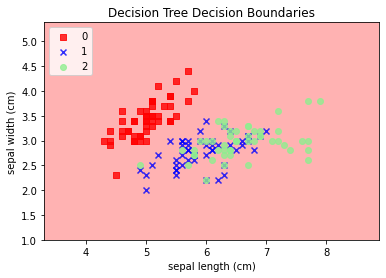

In [51]:
# Plot decision boundaries for the first two features
plot_decision_boundaries(X[:, :2], y, clf)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.title('Decision Tree Decision Boundaries')
plt.show()

## Visualize the Decision Tree Structure

In [52]:
from sklearn.tree import plot_tree

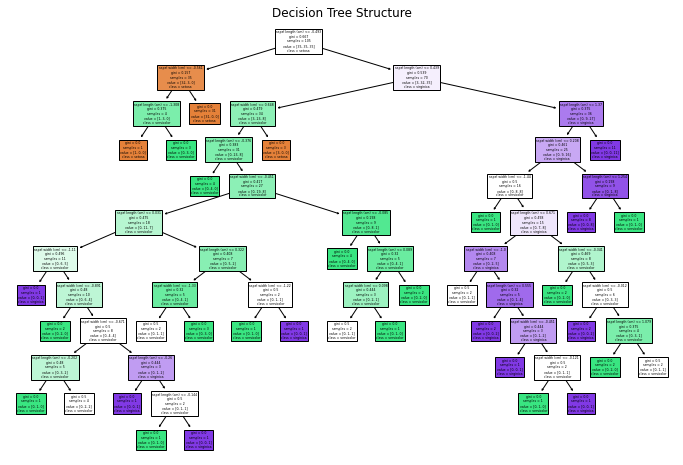

In [53]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Structure')
plt.show()

## **5. Random Forests:**

An ensemble of decision trees that improves classification accuracy by averaging multiple trees.

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Evaluate the model
print(f"Training accuracy: {rf.score(X_train, y_train)*100:.2f}")
print(f"Testing accuracy: {rf.score(X_test, y_test)*100:.2f}")

Training accuracy: 94.29
Testing accuracy: 66.67


In [57]:
y_pred_rf = rf.predict(X_test)

Accuracy: 66.67%

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.54      0.47      0.50        15
           2       0.53      0.53      0.53        15

    accuracy                           0.67        45
   macro avg       0.65      0.67      0.66        45
weighted avg       0.65      0.67      0.66        45


Confusion Matrix:
 [[15  0  0]
 [ 1  7  7]
 [ 1  6  8]]


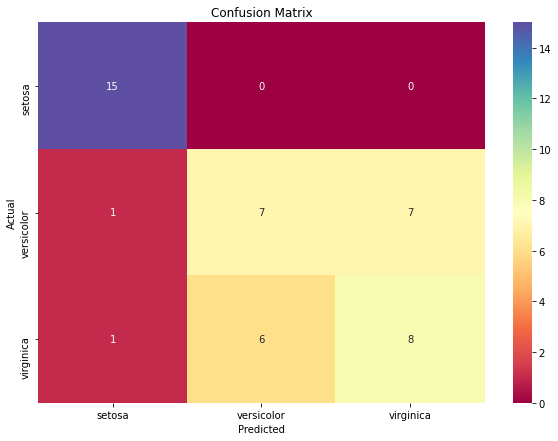

In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy*100:.2f}%')

# Classification report
class_report = classification_report(y_test, y_pred_rf)
print('\nClassification Report:\n', class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)

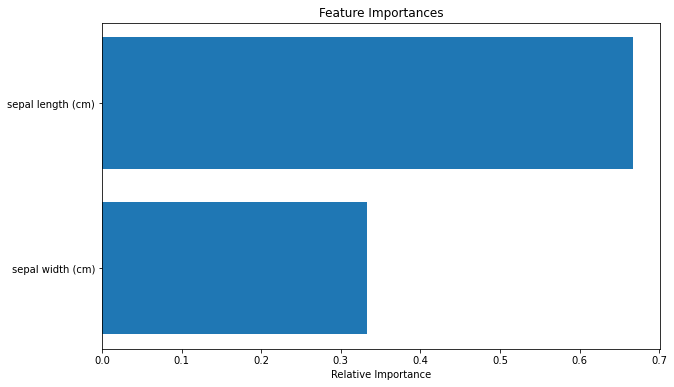

In [60]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **6. Gradient Boosting:**

Builds models sequentially, each correcting errors of the previous one to improve performance.
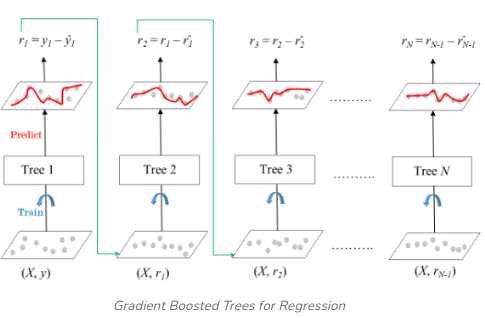

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
model = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=100)

In [63]:
y_pred_gb = model.predict(X_test)

Accuracy: 64.44
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.50      0.53      0.52        15
           2       0.53      0.53      0.53        15

    accuracy                           0.64        45
   macro avg       0.65      0.64      0.65        45
weighted avg       0.65      0.64      0.65        45


Confusion Matrix:
 [[13  1  1]
 [ 1  8  6]
 [ 0  7  8]]


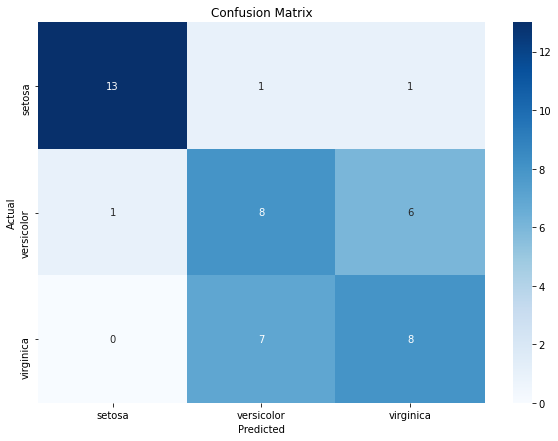

In [64]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy*100:.2f}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **7. Naive Bayes:**

Applies Bayes' theorem with an assumption of feature independence to classify data.

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
# Train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [67]:
y_pred_nb = nb.predict(X_test)

Accuracy: 68.89
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.56      0.60      0.58        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.68      0.69      0.68        45


Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 1  7  7]]


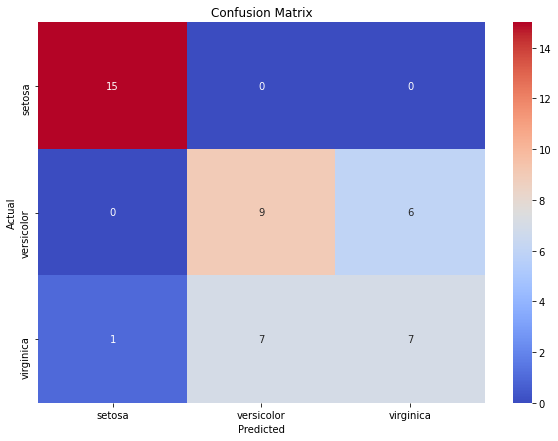

In [68]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy*100:.2f}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

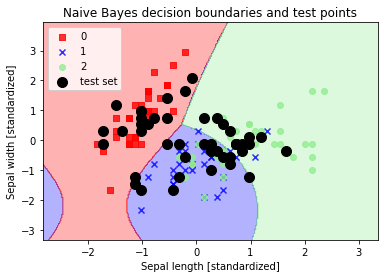

In [69]:
# Plotting decision boundaries and test points
plot_decision_boundaries(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), classifier=nb, test_idx=test_idx)
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Naive Bayes decision boundaries and test points')
plt.show()

## **8. AdaBoost:**

AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. It adjusts the weights of incorrectly classified instances, focusing more on difficult cases in subsequent iterations.

In [70]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier


In [71]:
# Load the Wine dataset
wine = load_wine()
X3 = wine.data
y3 = wine.target

In [72]:
# Split the dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [73]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X3_train, y3_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [74]:
y_pred_ada = ada.predict(X3_test)

Accuracy: 92.59
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.87      0.95      0.91        21
           2       1.00      0.79      0.88        14

    accuracy                           0.93        54
   macro avg       0.94      0.91      0.92        54
weighted avg       0.93      0.93      0.92        54


Confusion Matrix:
 [[19  0  0]
 [ 1 20  0]
 [ 0  3 11]]


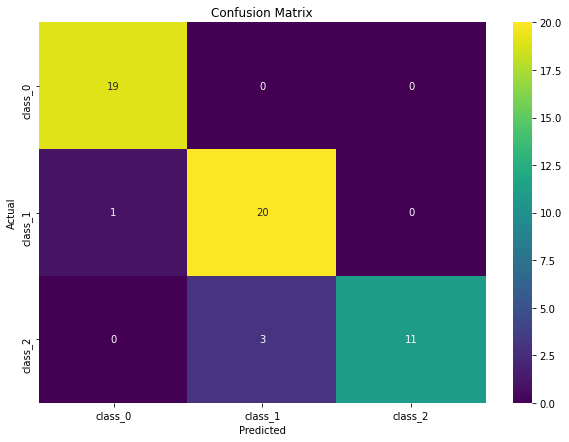

In [75]:
# Calculate the accuracy
accuracy = accuracy_score(y3_test, y_pred_ada)
print(f"Accuracy: {accuracy*100:.2f}")

# Print the classification report
print("Classification Report:\n", classification_report(y3_test, y_pred_ada))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y3_test, y_pred_ada)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **9. Linear Discriminant Analysis (LDA):**


In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(features_train, target_train)

LinearDiscriminantAnalysis()

In [78]:
target_pred = lda_classifier.predict(features_test)

Accuracy: 92.50
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.97      0.94      0.95        32

    accuracy                           0.93        40
   macro avg       0.87      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40


Confusion Matrix:
 [[ 7  1]
 [ 2 30]]


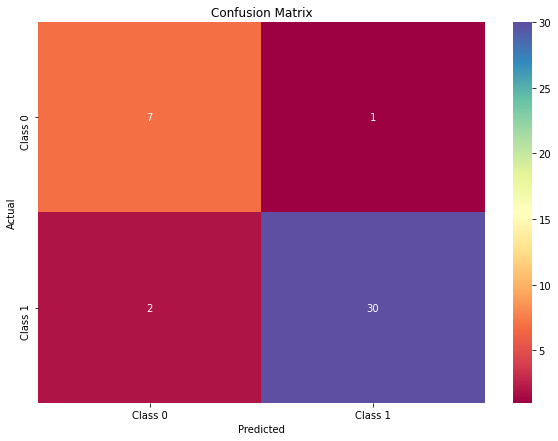

In [79]:
# Calculate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Print the classification report
print("Classification Report:\n", classification_report(target_test, target_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)
print('\nConfusion Matrix:\n', conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Spectral', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **The End :)**